<a id='task1'></a>
# Task 1: Importing and Introduction

In [1]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [3]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

<a id='task2'></a>
# Task 2: Dataset Creation and Preprocessing

In [4]:
X, y = make_blobs(n_features=50, centers=20, n_samples=20000,
                  cluster_std=0.2, center_box=[-1, 1], random_state=17)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.1, 
                                                     random_state=17)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='task3'></a>
# Task 3: Baseline Model

In [6]:
pca = PCA(n_components=2)
pca.fit(X_train)

res_pca = pca.transform(X_test)

Text(0.5, 1.0, 'PCA Results')

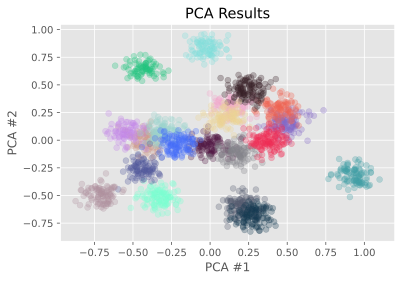

In [7]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    X_data = res_pca[y_test==unique_label]
    
    plt.scatter(X_data[:,0], X_data[:,1], alpha=0.3, c = cols[index])

plt.xlabel("PCA #1")
plt.ylabel("PCA #2")
plt.title("PCA Results")

<a id='task4'></a>
# Task 4: Autoencoder Training


In [8]:
autoencoder = MLPRegressor(alpha=1e-15, 
                           hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
                          random_state=1, max_iter=20000)
autoencoder.fit(X_train, X_train)

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

<a id='task5'></a>
# Task 5: Reducing Dimensionality with Encoder

In [9]:
W = autoencoder.coefs_
biases = autoencoder.intercepts_

In [10]:
for w in W:
    print(w.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [11]:
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [12]:
def encode(encoder_weights, encoder_biases, data):
    res_ae  = data
    for index, (w, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b
        else:
            res_ae = np.maximum(0, res_ae@w+b)
    return res_ae      
res_ae = encode(encoder_weights, encoder_biases, X_test)

In [13]:
res_ae.shape

(2000, 2)

Text(0.5, 1.0, 'Autoencoder Results')

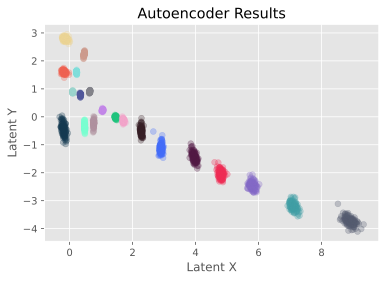

In [14]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test==unique_label]
    
    plt.scatter(latent_space[:,0], latent_space[:,1], alpha=0.3, c=cols[index])
                
plt.xlabel("Latent X")
plt.ylabel("Latent Y")  
plt.title("Autoencoder Results")

In [15]:
silhouette_score(X_test, y_test)

0.6100948647899368

In [16]:
silhouette_score(res_pca, y_test)

0.3678785197499094

In [17]:
silhouette_score(res_ae, y_test)

0.8074659601962659